# Smart Water Analytics

Este proyecto dará solución al problema propuesto por la competición homonima en Kaggle.  
El principal objetivo de la competición es encontrar un modelo que prediga o determine que features son relevantes para la disponibilidad de agua, en cada tipo de cuerpo de agua. Los tipos de cuerpos de agua son. 
- acuíferos 
- ríos
- lagos. 
- manantiales

El outcome deseado es tener cuatro modelos predictores, uno por cada tipo de cuerpo de agua (acuíferos, cascadas, ríos y lagos).

# 1. Preparación del Entorno. 

Antes de cargar los datos, se importarán las librerías que se requerirán:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np


# 2. Carga de Datos y EDA inicial. 

## Carga de Datos. 

### Lake. 

In [2]:
df_ra = pd.read_csv("../data/raw/River_Arno.csv")
df_ra.head()

Date  Rainfall_Le_Croci  Rainfall_Cavallina  Rainfall_S_Agata  \
0  01/01/1998                NaN                 NaN               NaN   
1  02/01/1998                NaN                 NaN               NaN   
2  03/01/1998                NaN                 NaN               NaN   
3  04/01/1998                NaN                 NaN               NaN   
4  05/01/1998                NaN                 NaN               NaN   

   Rainfall_Mangona  Rainfall_S_Piero  Rainfall_Vernio  Rainfall_Stia  \
0               NaN               NaN              NaN            NaN   
1               NaN               NaN              NaN            NaN   
2               NaN               NaN              NaN            NaN   
3               NaN               NaN              NaN            NaN   
4               NaN               NaN              NaN            NaN   

   Rainfall_Consuma  Rainfall_Incisa  Rainfall_Montevarchi  Rainfall_S_Savino  \
0               NaN              NaN                   NaN                NaN   
1               NaN              NaN                   NaN                NaN   
2               NaN              NaN                   NaN                NaN   
3               NaN              NaN                   NaN                NaN   
4               NaN              NaN                   NaN                NaN   

   Rainfall_Laterina  Rainfall_Bibbiena  Rainfall_Camaldoli  \
0                NaN                NaN                 NaN   
1                NaN                NaN                 NaN   
2                NaN                NaN                 NaN   
3                NaN                NaN                 NaN   
4                NaN                NaN                 NaN   

   Temperature_Firenze  Hydrometry_Nave_di_Rosano  
0                  NaN                       1.82  
1                  NaN                       1.94  
2                  NaN                       2.11  
3                  NaN                       1.84  
4                  NaN                       1.88

In [3]:
df_ra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8217 non-null   object 
 1   Rainfall_Le_Croci          6026 non-null   float64
 2   Rainfall_Cavallina         6026 non-null   float64
 3   Rainfall_S_Agata           6026 non-null   float64
 4   Rainfall_Mangona           6026 non-null   float64
 5   Rainfall_S_Piero           6026 non-null   float64
 6   Rainfall_Vernio            4283 non-null   float64
 7   Rainfall_Stia              1283 non-null   float64
 8   Rainfall_Consuma           1283 non-null   float64
 9   Rainfall_Incisa            4568 non-null   float64
 10  Rainfall_Montevarchi       1647 non-null   float64
 11  Rainfall_S_Savino          1283 non-null   float64
 12  Rainfall_Laterina          1283 non-null   float64
 13  Rainfall_Bibbiena          2378 non-null   float

In [4]:
df_ra.describe()

Rainfall_Le_Croci  Rainfall_Cavallina  Rainfall_S_Agata  \
count        6026.000000         6026.000000       6026.000000   
mean            3.129871            2.674743          2.670063   
std             8.025121            7.655847          7.166643   
min             0.000000            0.000000          0.000000   
25%             0.000000            0.000000          0.000000   
50%             0.000000            0.000000          0.000000   
75%             1.200000            0.600000          1.200000   
max            88.400000          113.600000        120.200000   

       Rainfall_Mangona  Rainfall_S_Piero  Rainfall_Vernio  Rainfall_Stia  \
count       6026.000000       6026.000000      4283.000000    1283.000000   
mean           3.340657          2.471225         3.416437       2.538893   
std            8.903134          6.650012         9.425358       6.502917   
min            0.000000          0.000000         0.000000       0.000000   
25%            0.000000          0.000000         0.000000       0.000000   
50%            0.000000          0.000000         0.000000       0.000000   
75%            1.400000          0.800000         1.200000       1.000000   
max          110.000000         80.600000       126.000000      63.000000   

       Rainfall_Consuma  Rainfall_Incisa  Rainfall_Montevarchi  \
count       1283.000000      4568.000000           1647.000000   
mean           3.416680         2.335026              2.056709   
std            8.938863         6.347652              6.117967   
min            0.000000         0.000000              0.000000   
25%            0.000000         0.000000              0.000000   
50%            0.000000         0.000000              0.000000   
75%            2.200000         0.800000              0.600000   
max          114.400000       102.200000             75.000000   

       Rainfall_S_Savino  Rainfall_Laterina  Rainfall_Bibbiena  \
count         1283.00000        1283.000000        2378.000000   
mean             2.42650           2.101949           2.640959   
std              7.23414           6.377879           7.161416   
min              0.00000           0.000000           0.000000   
25%              0.00000           0.000000           0.000000   
50%              0.00000           0.000000           0.000000   
75%              0.70000           0.400000           1.200000   
max            123.20000          95.600000          77.400000   

       Rainfall_Camaldoli  Temperature_Firenze  Hydrometry_Nave_di_Rosano  
count         1283.000000          6192.000000                8169.000000  
mean             3.826968            16.605386                   1.472407  
std              9.591337             7.458951                   0.616259  
min              0.000000            -2.700000                   0.000000  
25%              0.000000            10.650000                   1.100000  
50%              0.000000            16.350000                   1.300000  
75%              2.400000            22.700000                   1.690000  
max            103.600000            34.900000                   6.750000

## __EDA Inicial.__

### Análisis Univariable.

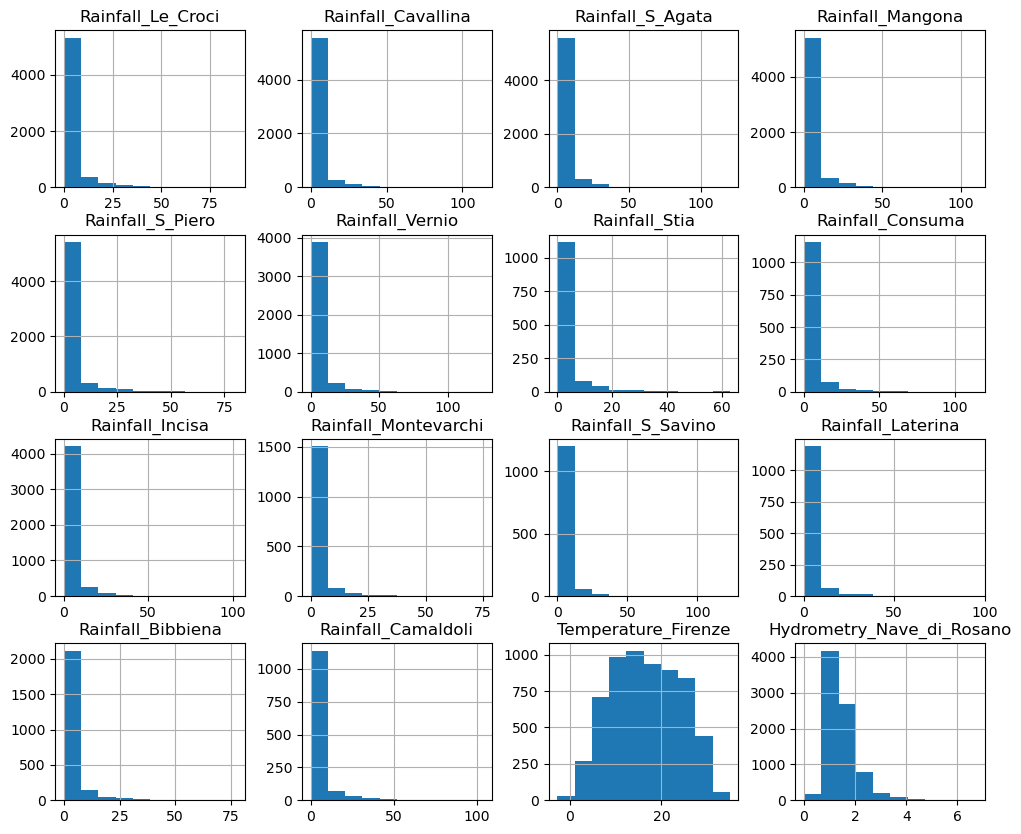

In [5]:
df_ra.hist(figsize=(12,10))
plt.show()

### Análisis Bivariado. 

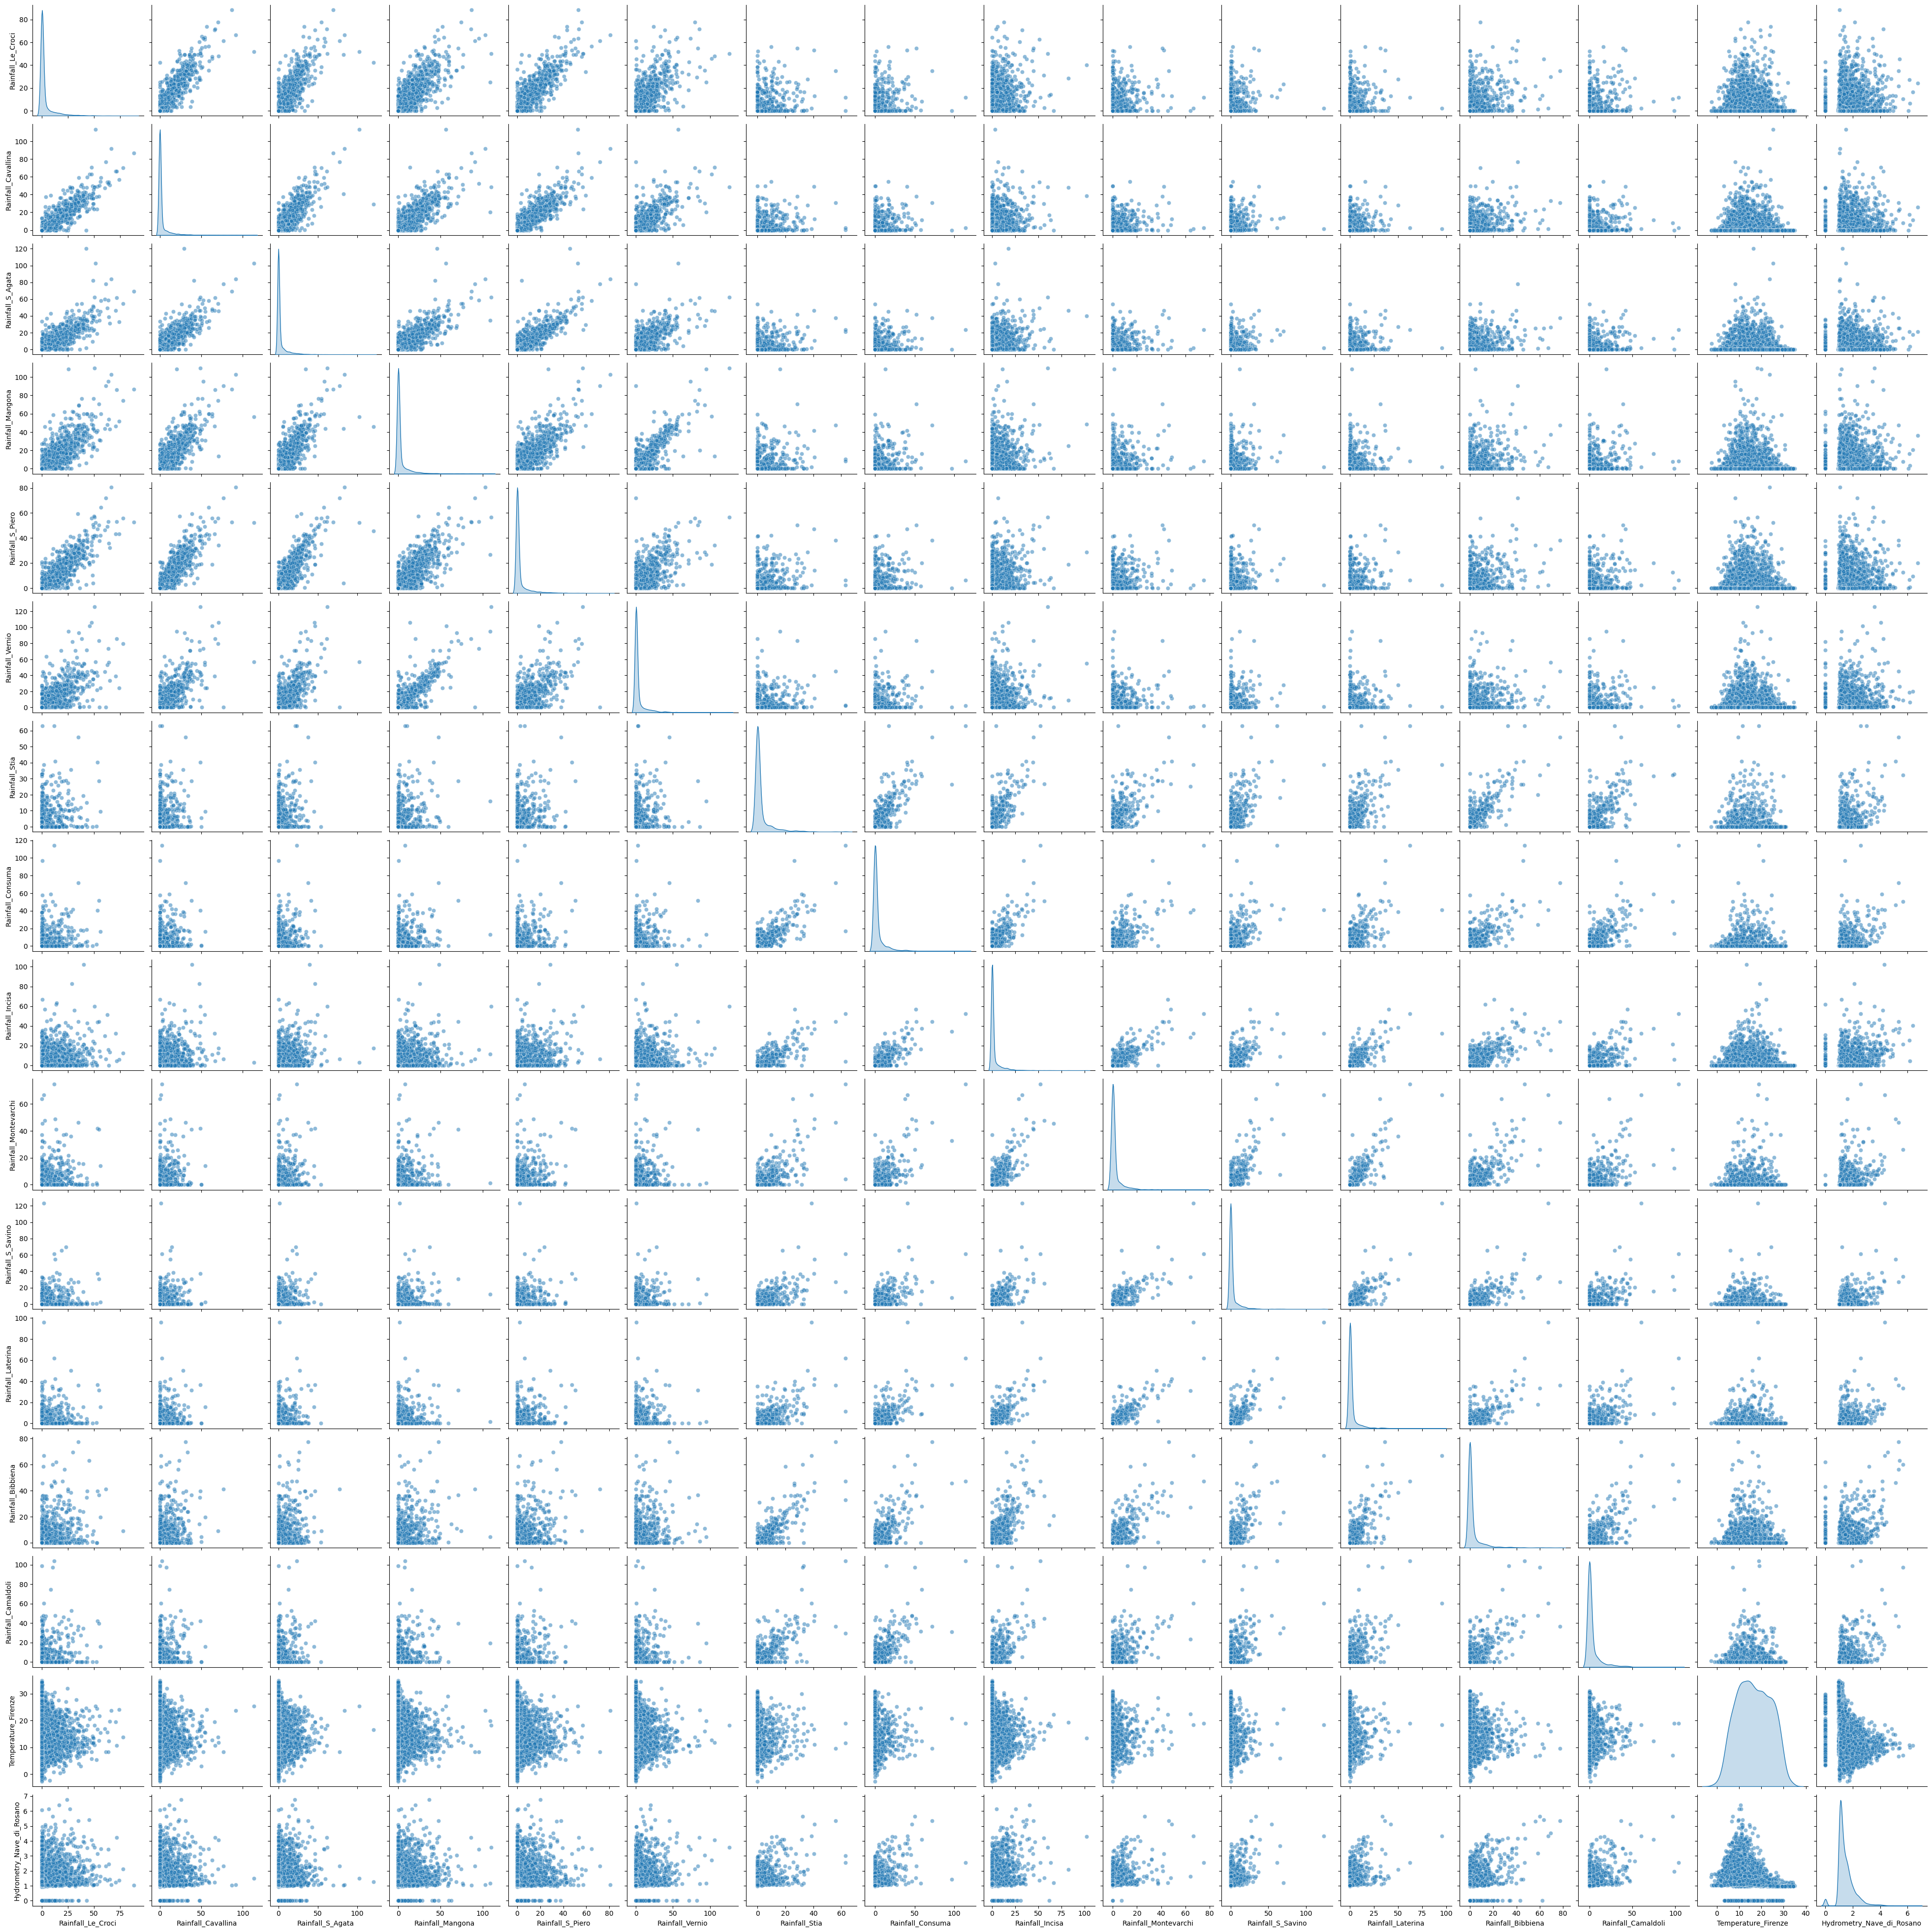

In [6]:
sns.pairplot(df_ra, diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})

### Correlación. 

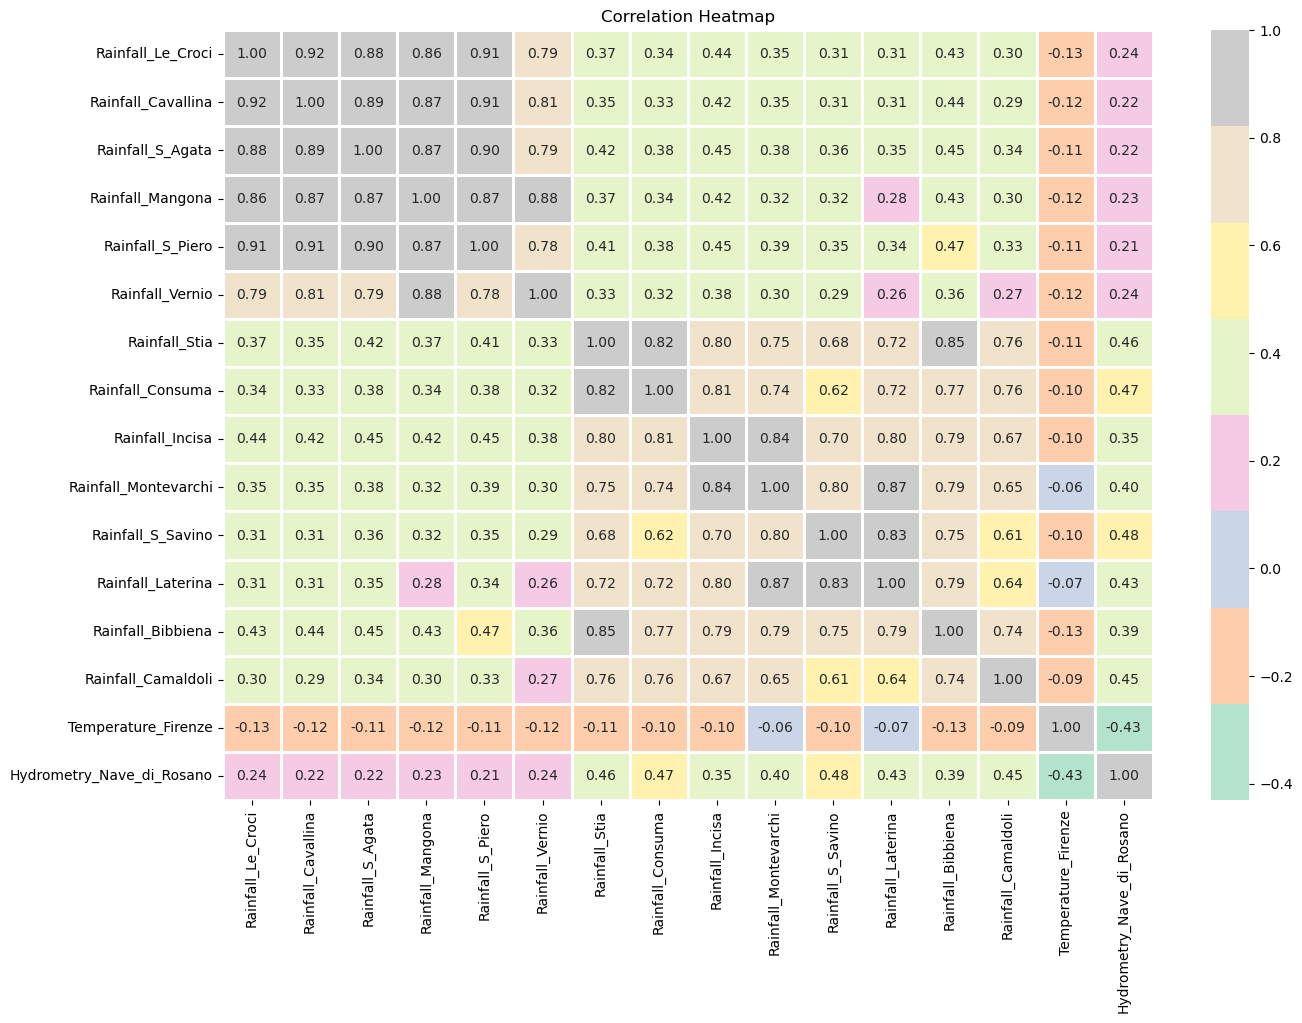

In [7]:
plt.figure(figsize=(15, 10))
df_wd = df_ra.drop(['Date'], axis=1)
sns.heatmap(df_wd.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

### __Hallazgos__

- Al tratar de encontrar la correlación de variables, se identificó que la feature Date es de tipo string en lugar de tipo numérico
- Se identificaron varias columnas con valores nulos
- En el gráfico de histogramas de las variables, se pueden observar outliers
- Se observó que hay features que hablan sobre una misma característica y esto genera multicolinealidad entre ellas en la correlación

# 3. Limpieza de Datos (Data Cleansing). 

### Tratamiento de valores nulos.

In [8]:
# Eliminación de valores nulos en DataFrames
def eliminated_nulls(df):
    fecha_actual = datetime.now()
    df.fillna(0, inplace=True)
    df['Date'].fillna(fecha_actual, inplace=True)

eliminated_nulls(df_ra)


/var/folders/z5/1t80mr5s6n10j0fkr7bb6x6c0000gn/T/ipykernel_31243/1977203490.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date'].fillna(fecha_actual, inplace=True)


### Tratamiento de Outliers.  
Función para encontrar columnas con Outliers:

In [9]:
def outliers_column(df):
    columnas_con_outliers = []
    
    # Iterar sobre cada columna del DataFrame
    for col in df.columns:
        # Asegurarse de que la columna es numérica
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            
            # Definir los límites para los outliers
            limite_inferior = q1 - 1.5 * iqr
            limite_superior = q3 + 1.5 * iqr
            
            # Verificar si hay algún valor atípico en la columna
            outliers_presentes = ((df[col] < limite_inferior) | (df[col] > limite_superior)).any()
            
            # Si se encuentran outliers, agregar el nombre de la columna a la lista
            if outliers_presentes:
                columnas_con_outliers.append(col)
    
    return columnas_con_outliers

#### Outliers. 

In [10]:
ra_oc = outliers_column(df_ra)
print(f"Columnas con outliers en df_aa: {ra_oc}")
df_ra_oc = df_ra[ra_oc]

Columnas con outliers en df_aa: ['Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Rainfall_S_Agata', 'Rainfall_Mangona', 'Rainfall_S_Piero', 'Rainfall_Vernio', 'Rainfall_Stia', 'Rainfall_Consuma', 'Rainfall_Incisa', 'Rainfall_Montevarchi', 'Rainfall_S_Savino', 'Rainfall_Laterina', 'Rainfall_Bibbiena', 'Rainfall_Camaldoli', 'Hydrometry_Nave_di_Rosano']


Función para obtener gráfico de todos los outliers:

In [11]:
def plot_outliers_boxplots(df, columns):
    # 1. Contar el número de columnas con outliers
    num_cols = len(columns)

    # 2. Definir la disposición de los subplots (ej. 2 filas, 2 columnas)
    # Esto es flexible, puedes ajustarlo según tus necesidades
    num_filas = 4
    num_columnas = int(np.ceil(num_cols / num_filas))

    # 3. Crear la figura y los subplots
    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 10))

    # Aplanar el array de ejes para iterar fácilmente
    axes = axes.flatten()

    # 4. Iterar sobre las columnas y dibujar el box plot en cada subplot
    for i, col in enumerate(columns):
        ax = axes[i]
        ax.boxplot(df[col], vert=False) # vert=False para que sean horizontales
        ax.set_title(f'{col}')
        ax.set_xlabel('Valores')
        ax.grid(True, linestyle='--', alpha=0.6)

    # Ocultar los subplots que no se usen (si los hay)
    for i in range(num_cols, len(axes)):
        axes[i].axis('off')

    # Ajustar el espaciado entre subplots
    plt.tight_layout()
    plt.show()

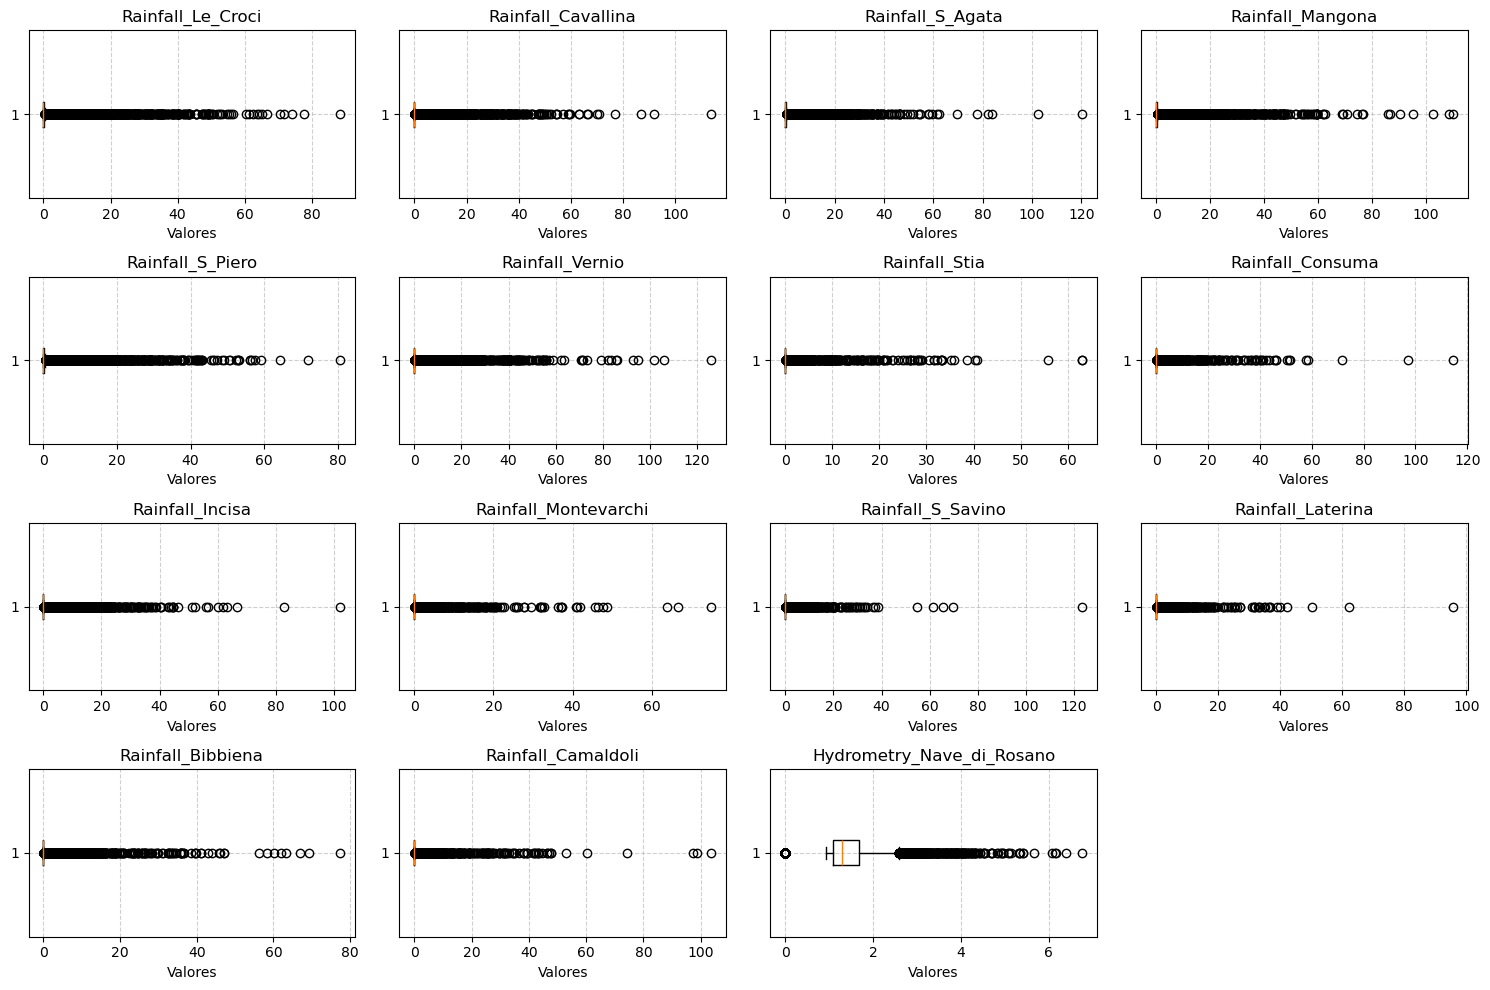

In [12]:
plot_outliers_boxplots(df_ra_oc, ra_oc)

### Cambio de tipo de datos (features).

In [13]:
# Cambiar fecha de string a datetime
df_ra['Date'] = pd.to_datetime(df_ra['Date'], format='%d/%m/%Y')
df_ra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8217 non-null   datetime64[ns]
 1   Rainfall_Le_Croci          8217 non-null   float64       
 2   Rainfall_Cavallina         8217 non-null   float64       
 3   Rainfall_S_Agata           8217 non-null   float64       
 4   Rainfall_Mangona           8217 non-null   float64       
 5   Rainfall_S_Piero           8217 non-null   float64       
 6   Rainfall_Vernio            8217 non-null   float64       
 7   Rainfall_Stia              8217 non-null   float64       
 8   Rainfall_Consuma           8217 non-null   float64       
 9   Rainfall_Incisa            8217 non-null   float64       
 10  Rainfall_Montevarchi       8217 non-null   float64       
 11  Rainfall_S_Savino          8217 non-null   float64       
 12  Rainfa

# 4. Ingeniería de Características (Feature Engineering). 

## Transformación de formato (Wide -> Long). 

Al realizar el EDA inicial, se identificó que existen variables (features) que representan el mismo valor, pero diferente ubicación, por ejemplo, la variable __Rainfall__ esta repetida varias veces en varias ubicaciones, es por esto que se decidirá cambiar el formato del Dataframe, con el fin de obtener una sola variable, esto también ayudará a que nuestra variable target __Volume__ sea correctamente tratada.

Función general para realizar transformación de formato Wide -> Long.

In [14]:
# Transformación de formato (Wide -> Long)
def melt_multiple_variables(df, value_prefix_list, prefix_name):
    """
    Transforma un DataFrame de formato ancho a largo para múltiples variables.

    Args:
        df (pd.DataFrame): El DataFrame a transformar.
        value_prefix_list (list): Una lista de prefijos para las variables a derretir.
                                  Ej: ["Rainfall_", "Temperature_", "Hydrometry_"]

    Returns:
        pd.DataFrame: El DataFrame transformado en formato largo.
    """
    # Identificar todas las columnas que se van a derretir
    value_vars = []
    for prefix in value_prefix_list:
        value_vars.extend([col for col in df.columns if col.startswith(prefix)])
        
    # Identificar las columnas que no se van a derretir (id_vars)
    id_vars = [col for col in df.columns if col not in value_vars]
    
    # Realizar el melt
    df_long = df.melt(
        id_vars=id_vars,
        value_vars=value_vars,
        var_name=prefix_name + '_Location',
        value_name=prefix_name + '_Value'
    )
    
    # Separar la columna 'Measurement_Type' en 'Variable' y 'Ubicacion'
    # Esto asume que el formato es siempre 'Prefijo_Ubicacion'
    df_long[prefix_name + '_Location'] = df_long[prefix_name + '_Location'].apply(lambda x: x.split('_', 1)[1])
    #df_long[prefix_name + '_Location'] = df_long[prefix_name + '_Location'].apply(lambda x: x.split('_', 1)[1])
    
    # Opcional: Eliminar la columna intermedia 'Measurement_Type'
    #df_long = df_long.drop(columns=['Measurement_Type'])
    
    return df_long

In [15]:
# Lista de todos los prefijos que quieres derretir
prefixes = ["Rainfall_"]

# Llama a la función una sola vez
df_river_hydrology = melt_multiple_variables(df_ra, prefixes, prefix_name="Rainfall")

print(df_river_hydrology.head())

        Date  Temperature_Firenze  Hydrometry_Nave_di_Rosano  \
0 1998-01-01                  0.0                       1.82   
1 1998-01-02                  0.0                       1.94   
2 1998-01-03                  0.0                       2.11   
3 1998-01-04                  0.0                       1.84   
4 1998-01-05                  0.0                       1.88   

  Rainfall_Location  Rainfall_Value  
0          Le_Croci             0.0  
1          Le_Croci             0.0  
2          Le_Croci             0.0  
3          Le_Croci             0.0  
4          Le_Croci             0.0  


In [16]:
df_river_hydrology.head()  

Date  Temperature_Firenze  Hydrometry_Nave_di_Rosano  \
0 1998-01-01                  0.0                       1.82   
1 1998-01-02                  0.0                       1.94   
2 1998-01-03                  0.0                       2.11   
3 1998-01-04                  0.0                       1.84   
4 1998-01-05                  0.0                       1.88   

  Rainfall_Location  Rainfall_Value  
0          Le_Croci             0.0  
1          Le_Croci             0.0  
2          Le_Croci             0.0  
3          Le_Croci             0.0  
4          Le_Croci             0.0

In [17]:
# Lista de todos los prefijos que quieres derretir
prefixes_t = ["Temperature_"]

# Llama a la función una sola vez
df_river_hydrology = melt_multiple_variables(df_river_hydrology, prefixes_t, prefix_name="Temperature")

print(df_river_hydrology.head())

        Date  Hydrometry_Nave_di_Rosano Rainfall_Location  Rainfall_Value  \
0 1998-01-01                       1.82          Le_Croci             0.0   
1 1998-01-02                       1.94          Le_Croci             0.0   
2 1998-01-03                       2.11          Le_Croci             0.0   
3 1998-01-04                       1.84          Le_Croci             0.0   
4 1998-01-05                       1.88          Le_Croci             0.0   

  Temperature_Location  Temperature_Value  
0              Firenze                0.0  
1              Firenze                0.0  
2              Firenze                0.0  
3              Firenze                0.0  
4              Firenze                0.0  


In [18]:
# Lista de todos los prefijos que quieres derretir
prefixes_h = ["Hydrometry_"]

# Llama a la función una sola vez
df_river_hydrology = melt_multiple_variables(df_river_hydrology, prefixes_h, prefix_name="Hydrometry")

print(df_river_hydrology.head())

        Date Rainfall_Location  Rainfall_Value Temperature_Location  \
0 1998-01-01          Le_Croci             0.0              Firenze   
1 1998-01-02          Le_Croci             0.0              Firenze   
2 1998-01-03          Le_Croci             0.0              Firenze   
3 1998-01-04          Le_Croci             0.0              Firenze   
4 1998-01-05          Le_Croci             0.0              Firenze   

   Temperature_Value Hydrometry_Location  Hydrometry_Value  
0                0.0      Nave_di_Rosano              1.82  
1                0.0      Nave_di_Rosano              1.94  
2                0.0      Nave_di_Rosano              2.11  
3                0.0      Nave_di_Rosano              1.84  
4                0.0      Nave_di_Rosano              1.88  


### Variables categóricas a variables numéricas.

Ahora que se transformaron las columnas de los dataset, se convertirán las variables categóricas a variables numéricas, con el fin de facilitar el análisis.

In [19]:
def transform_ubications_to_numbers(df, column_name):
    """
    Mapea las ubicaciones de lluvia a números únicos.
    
    Args:
        df (DataFrame): DataFrame que contiene la columna de ubicaciones de lluvia.
        column_name (str): Nombre de la columna que contiene las ubicaciones de lluvia.
    
    Returns:
        DataFrame: DataFrame con la columna de ubicaciones mapeada a números.
    """
    all_ubications = df[column_name].unique()
    ubications_map = {}
    num = 1
    
    for ubication in all_ubications:
        ubications_map[ubication] = num
        num += 1

    print(f"Ubicaciones de lluvia mapeadas: {ubications_map}")

    # Mapeo de ubicaciones de lluvia a números
    df[column_name] = df[column_name].map(ubications_map)
    
    return df

In [20]:
df_river_hydrology = transform_ubications_to_numbers(df_river_hydrology, 'Rainfall_Location')
df_river_hydrology = transform_ubications_to_numbers(df_river_hydrology, 'Temperature_Location')
df_river_hydrology = transform_ubications_to_numbers(df_river_hydrology, 'Hydrometry_Location')
df_river_hydrology.head()

Ubicaciones de lluvia mapeadas: {'Le_Croci': 1, 'Cavallina': 2, 'S_Agata': 3, 'Mangona': 4, 'S_Piero': 5, 'Vernio': 6, 'Stia': 7, 'Consuma': 8, 'Incisa': 9, 'Montevarchi': 10, 'S_Savino': 11, 'Laterina': 12, 'Bibbiena': 13, 'Camaldoli': 14}
Ubicaciones de lluvia mapeadas: {'Firenze': 1}
Ubicaciones de lluvia mapeadas: {'Nave_di_Rosano': 1}


Date  Rainfall_Location  Rainfall_Value  Temperature_Location  \
0 1998-01-01                  1             0.0                     1   
1 1998-01-02                  1             0.0                     1   
2 1998-01-03                  1             0.0                     1   
3 1998-01-04                  1             0.0                     1   
4 1998-01-05                  1             0.0                     1   

   Temperature_Value  Hydrometry_Location  Hydrometry_Value  
0                0.0                    1              1.82  
1                0.0                    1              1.94  
2                0.0                    1              2.11  
3                0.0                    1              1.84  
4                0.0                    1              1.88

### Encontrar variables que se volvieron constantes

In [21]:
# Encontrar variables que se volvieron constantes
df_river_hydrology.describe()

Date  Rainfall_Location  Rainfall_Value  \
count               115038      115038.000000   115038.000000   
mean   2009-04-01 00:00:00           7.500000        1.211933   
min    1998-01-01 00:00:00           1.000000        0.000000   
25%    2003-08-17 00:00:00           4.000000        0.000000   
50%    2009-04-01 00:00:00           7.500000        0.000000   
75%    2014-11-15 00:00:00          11.000000        0.000000   
max    2020-06-30 00:00:00          14.000000      126.000000   
std                    NaN           4.031146        5.249652   

       Temperature_Location  Temperature_Value  Hydrometry_Location  \
count              115038.0      115038.000000             115038.0   
mean                    1.0          12.513150                  1.0   
min                     1.0          -2.700000                  1.0   
25%                     1.0           1.050000                  1.0   
50%                     1.0          12.600000                  1.0   
75%                     1.0          20.600000                  1.0   
max                     1.0          34.900000                  1.0   
std                     0.0           9.650172                  0.0   

       Hydrometry_Value  
count     115038.000000  
mean           1.463806  
min            0.000000  
25%            1.090000  
50%            1.300000  
75%            1.690000  
max            6.750000  
std            0.624583

In [22]:
df_river_hydrology.drop(columns=['Temperature_Location', 'Hydrometry_Location'], inplace=True)

No se enonctró ninguna variable constante, por lo que no será realizar alguna eliminación.

# 5. EDA refinado y visualización. 

### Análisis Univariado. 

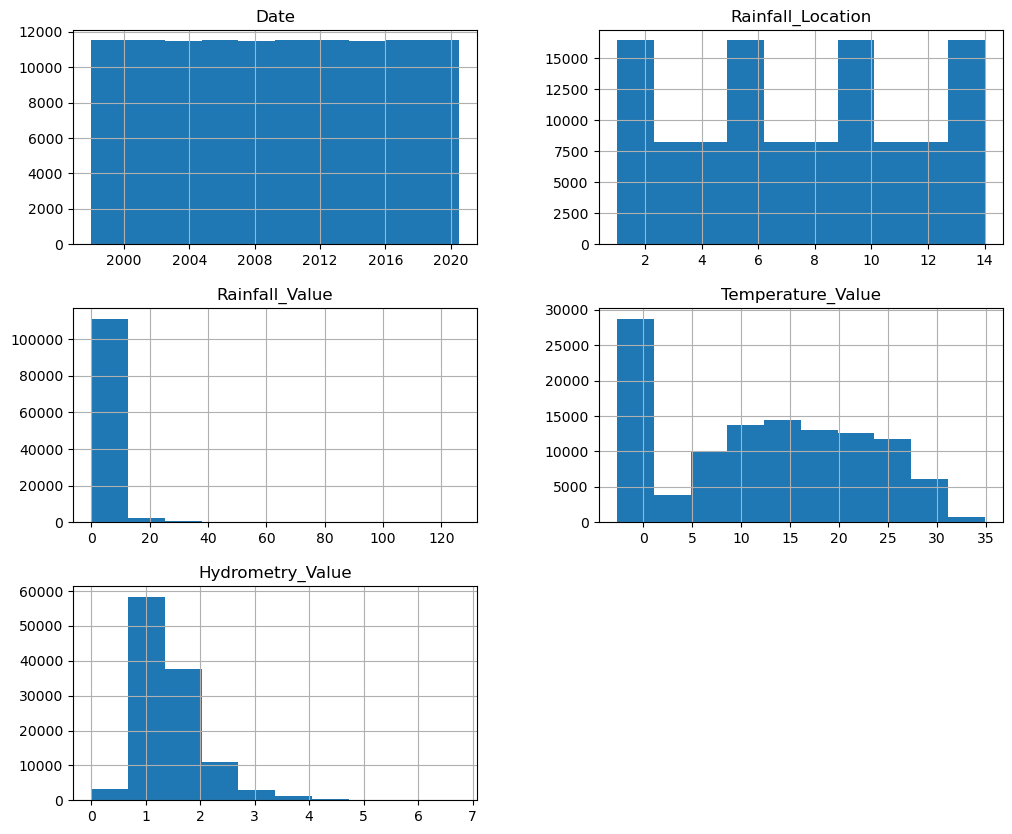

In [23]:
df_river_hydrology.hist(figsize=(12,10))
plt.show()

### Análisis Bivariado.  

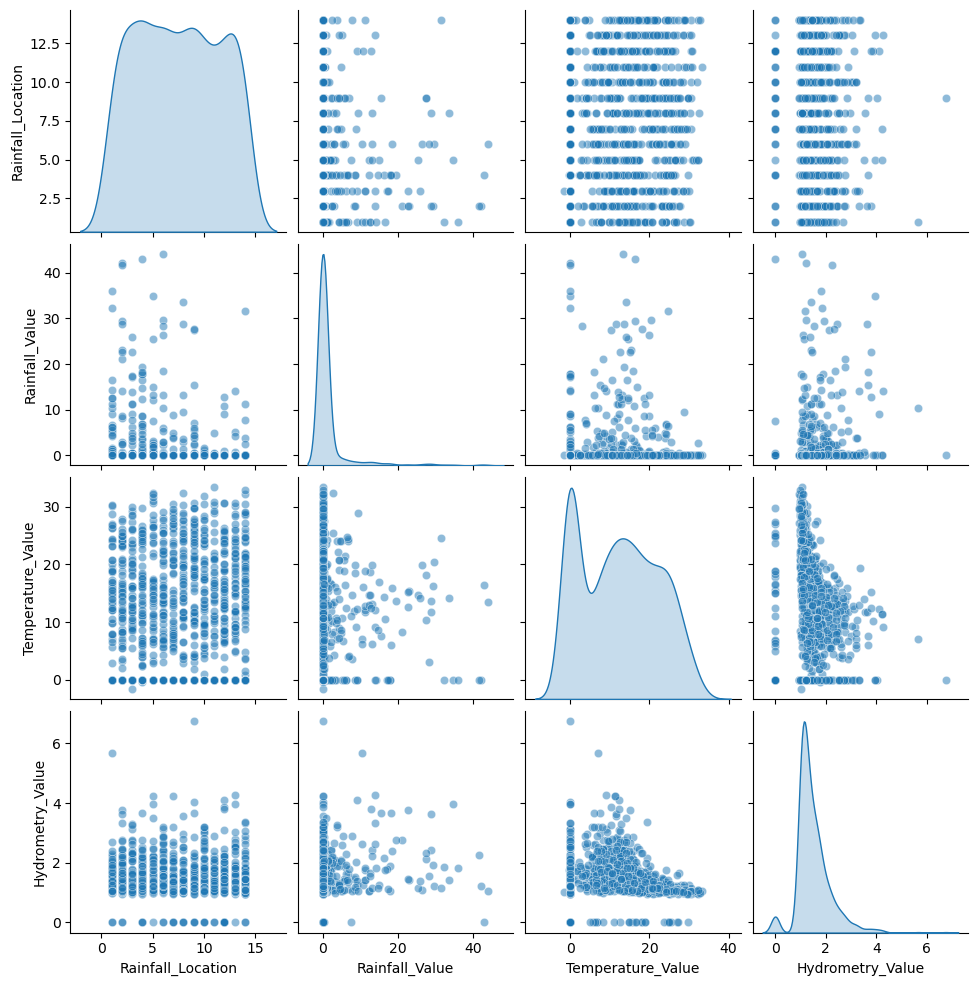

In [24]:
df_sample_river = df_river_hydrology.sample(n=1000) # O .sample(frac=0.01) para el 1% de los datos
sns.pairplot(df_sample_river, diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})

### Correlación. 

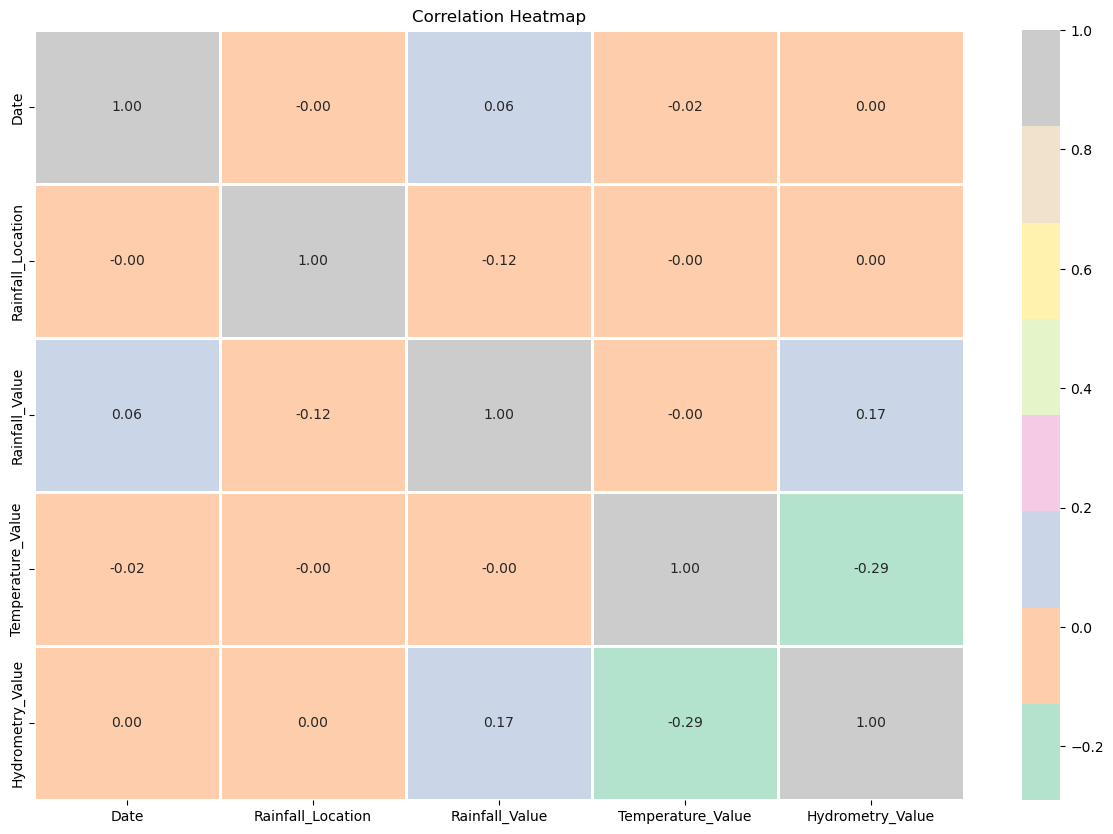

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_river_hydrology.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

# 6. Guardar datos limpios y preprocesados. 

In [26]:
df_river_hydrology.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115038 entries, 0 to 115037
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               115038 non-null  datetime64[ns]
 1   Rainfall_Location  115038 non-null  int64         
 2   Rainfall_Value     115038 non-null  float64       
 3   Temperature_Value  115038 non-null  float64       
 4   Hydrometry_Value   115038 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 4.4 MB


In [27]:
# Guardar el DataFrame limpio y preprocesado
df_river_hydrology.to_csv('../data/processed/rivers/river_hydrology_data_clean.csv', index=False)